In [78]:
from IPython.core.display import display, HTML
from math import pi

In [80]:
times = []
heights = []
def reset(time, h):
    times[:] = [time]
    heights[:] = [h]
    
def add_height(time, h):
    times.append(time)
    heights.append(h)

def plot_heights():
    import matplotlib.pyplot as plt
    plt.plot(times, heights)

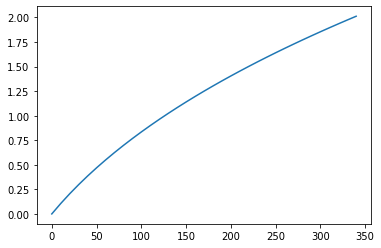

In [101]:
time = 0
height = 0
pour_vol = 100
filled_vol = 0
fill_rate = 0.3
dt = 10

reset(time, height)
def container_radius(height):
    return 3+height

while pour_vol >= 0:
    vol_per_dt = dt*fill_rate
    pour_vol = pour_vol - vol_per_dt
    
    r = container_radius(height)
    area = pi*r**2
    height = height + vol_per_dt/area
    time = time + dt
    add_height(time, height)

plot_heights()

In [102]:
radii = [container_radius(h) for h in heights]
js_data = "\n".join(f"const {name} = {repr(data)};" for name, data in [
    ("times", times),
    ("heights", heights),
    ("radii", radii)
])

display(HTML("""
<div id="mycanvas3" style="height: 50ex"></div>
<script type="module">
    DATA
    
    import * as THREE from 'https://unpkg.com/three@0.126.1/build/three.module.js';
    import { OrbitControls } from 'https://unpkg.com/three@0.126.1/examples/jsm/controls/OrbitControls.js';
    
    var container = document.getElementById("mycanvas3");
    var scene = new THREE.Scene();
    var camera = new THREE.PerspectiveCamera(75, window.innerWidth / window.innerHeight, 0.1, 1000);
    var renderer = new THREE.WebGLRenderer();
    renderer.setSize(container.clientWidth, container.clientHeight);
    renderer.setPixelRatio( window.devicePixelRatio );
    container.appendChild( renderer.domElement );
    
    for (var i = 0; i<times.length-1; ++i)
    {
        const material = new THREE.MeshLambertMaterial( { color: 0x00ff00 } );
        const geometry = new THREE.CylinderGeometry(radii[i], radii[i], heights[i+1]-heights[i], 50);
        const mesh = new THREE.Mesh(geometry, material);
        mesh.position.y = heights[i]
        scene.add(mesh);
    }
    
    const light = new THREE.DirectionalLight( 0xffffff, 2 );
    light.position.set( 1, 0.5, 3 );
    scene.add( light );
    const light2 = new THREE.DirectionalLight( 0xffffff, 2 );
    light2.position.set( -2, -3, -10 );
    scene.add( light2 );
    

    camera.position.z = 25;
    
    function render() {
        renderer.render( scene, camera );
    }
    
    render();
    
    var orbit = new OrbitControls( camera, renderer.domElement );
    orbit.update();
    orbit.addEventListener( 'change', render );
</script>
""".replace("DATA", js_data)))